<div style="float: left; display: flex;" >
    <img src="./logo-ifg-vertical-anapolis.png" alt="Alternative text" width="80" />
    <div>
        <b>INSTITUTO FEDERAL DE GOIÁS<br/>
        PÓS-GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL APLICADA<br/></b>
        <b>Disciplina:</b> Machine Learning <br/>
        <b>Professor:</b> Daniel Xavier <br/>
        <b>Alunos:</b> Lucas Tadeu Studart de Carvalho; Marcos Rodrigues Brugnaro
    </div>
</div>

In [1]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 3.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 3.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=1a0e1fbae1170e9ab9c7aa973a04ca68c68e64984b2494773d7bda578f12d3ce
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5c/94/1f/953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from six import StringIO
from pandas.plotting import scatter_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.model_selection import learning_curve
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import pydotplus
from IPython.display import Image 

pd.set_option('display.max_columns', None)

### Base de dados
- Dados provenientes do site Kaggle
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Mobile Price Classification
- Desafio é classificação de preços dos dispositivos mobile relacionando com suas características de hardware
    - 0 (low cost)
    - 1 (medium cost) 
    - 2 (high cost) 
    - 3 (very high cost)
- Dataset previamente dividido em treino e teste

### Dicionário de dados

<div>
    <table>
  <tr>
    <th><span style='background-color:lightgrey'>battery_power:</span></th>
    <th><span style='background-color:lightgrey'>blue:</span></th>
    <th><span style='background-color:lightgrey'>clock_speed:</span></th>
    <th><span style='background-color:lightgrey'>dual_sim:</span></th>
    <th><span style='background-color:lightgrey'>fc:</span></th>
    <th><span style='background-color:lightgrey'>four_g:</span></th>
    <th><span style='background-color:lightgrey'>int_memory:</span></th>
  </tr>
  <tr>
    <td>Total energy a battery can store in one time measured in mAh</td>
    <td>Has bluetooth or not</td>
    <td>speed at which microprocessor executes instructions</td>
    <td>Has dual sim support or not</td>
    <td>Front Camera mega pixels</td>
    <td>Has 4G or not</td>
    <td>Internal Memory in Gigabytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>m_dep:</span></th>
    <th><span style='background-color:lightgrey'>mobile_wt:</span></th>
    <th><span style='background-color:lightgrey'>n_cores:</span></th>
    <th><span style='background-color:lightgrey'>pc:</span></th>
    <th><span style='background-color:lightgrey'>px_height:</span></th>
    <th><span style='background-color:lightgrey'>px_width:</span></th>
    <th><span style='background-color:lightgrey'>ram:</span></th>
  </tr>
  <tr>
    <td>Mobile Depth in cm</td>
    <td>Weight of mobile phone</td>
    <td>Number of cores of processor</td>
    <td>Primary Camera mega pixels</td>
    <td>Pixel Resolution Height</td>
    <td>Pixel Resolution Width</td>
    <td>Random Access Memory in Mega Bytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>sc_h:</span></th>
    <th><span style='background-color:lightgrey'>sc_w:</span></th>
    <th><span style='background-color:lightgrey'>talk_time:</span></th>
    <th><span style='background-color:lightgrey'>three_g:</span></th>
    <th><span style='background-color:lightgrey'>touch_screen:</span></th>
    <th><span style='background-color:lightgrey'>wifi:</span></th>
    <th><span style='background-color:lightgrey'>price_range:</span></th>
  </tr>
  <tr>
    <td>Screen Height of mobile in cm</td>
    <td>Screen Width of mobile in cm</td>
    <td>longest time that a single battery charge will last when you are</td>
    <td>Has 3G or not</td>
    <td>Has touch screen or not</td>
    <td>Has wifi or not</td>
    <td>This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</td>
  </tr>
</table>
</div>

### Função para carregar datasets

In [4]:
def read_parquet_data(bucket, data_key):
    return 's3://{}/{}'.format(bucket, data_key)

### Carregando (dataset de treino)

In [5]:
celltrain = pd.read_parquet(read_parquet_data('cellphone-data', 'target_data/parquet_data/run-1674677203344-part-block-0-r-00000-uncompressed.parquet'), engine='auto')

### Carregando (dataset de teste)

In [6]:
celltest = pd.read_parquet(read_parquet_data('cellphone-data', 'target_test_data/parquet_test_data/run-1674704156282-part-block-0-r-00000-uncompressed.parquet'), engine='auto')

### Análise Exploratória dos Dados (EDA)

#### Primeiros registros
- Observamos que há 2000 instâncias e 21 features no dataset de treino
- Observamos que há 1000 instâncias e 21 features no dataset de teste

In [7]:
celltrain.head(3)
print(f'celltrain shape:{celltrain.shape}')

celltrain shape:(2000, 21)


In [8]:
celltest.head(3)
print(f'celltest shape:{celltest.shape}')

celltest shape:(1000, 21)


#### Resumo sobre os dados
    
- Observamos, a seguir, que as features:
##### battery_power, fc, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time 
##### são passíveis de normalização, pois destoam das demais ordens de grandeza de outras features.


In [9]:
celltrain.info()
celltrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Histogramas de cada feature
##### Observamos que:
- Há um percentual de 50% de telefones com baixo clock (<1.5Ghz); 
- Câmera frontal de baixa resolução (<3MP);
- Baixa memória interna (<30GB);
- Pequeno comprimento de tela (<5cm).

##### Provavelmente, por esse conjunto de análise de informações, podemos estar nos referindo a telefones mais antigos.
    

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


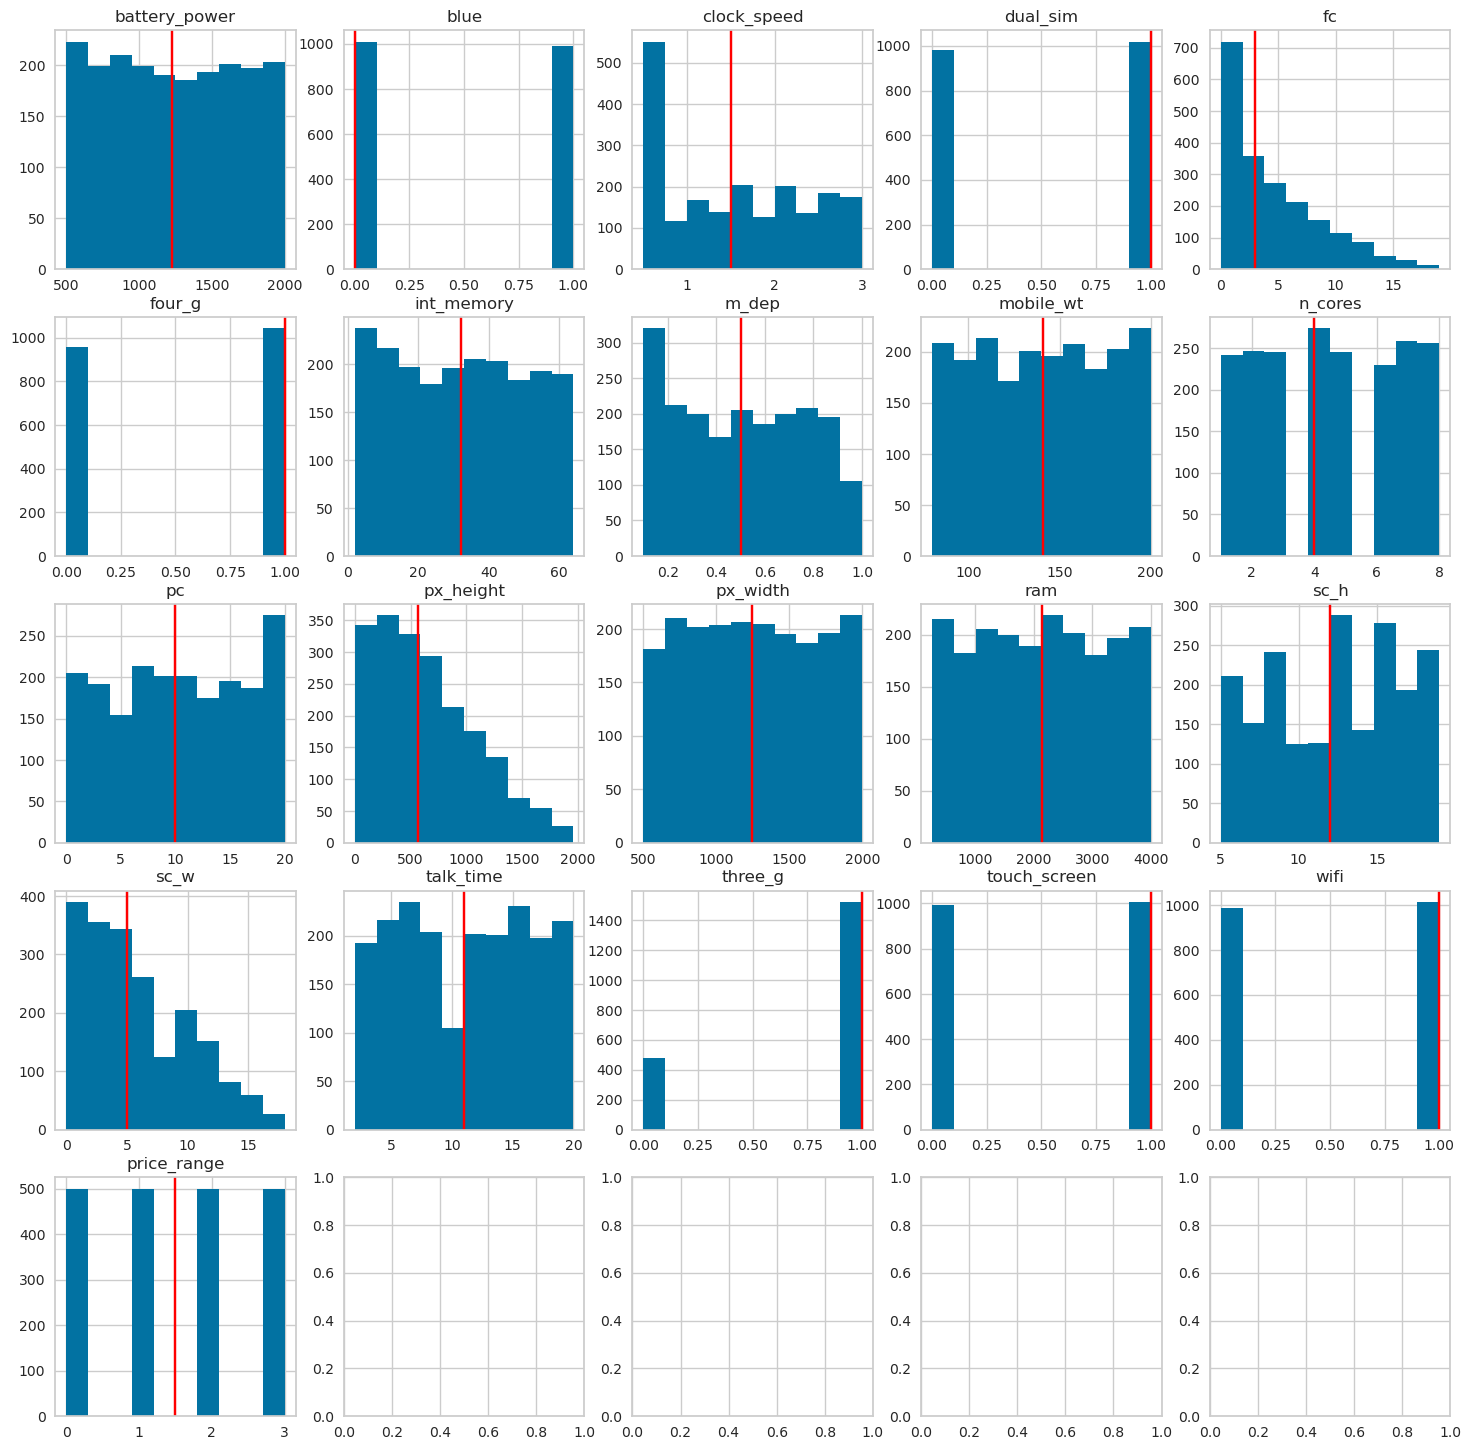

In [10]:
def plot_histograms(df):
    rows = 5
    cols = 5
    fig, axs = plt.subplots(rows,cols,figsize=(18,18))
    for i,nf in enumerate(df.columns):
        axs[i//cols, i%cols].hist(df[nf])
        axs[i//cols, i%cols].set_title(nf)
        axs[i//cols, i%cols].axvline(df[nf].quantile(0.5), color='red')

plot_histograms(celltrain)

### Feature engineering
- Criação das features polegadas e densidade de pixels (ppi) 
#### Observamos:
- Há uma porcentagem de 50% de smartphones com baixa densidade de pixels (<300ppi); 
- Observamos também que há telefones com mais de 643 ppi, a maior densidade de pixels para um telefone no ano de 2022 (Sony Xperia 1 IV). Podem ser encarados como dados suspeitos e que precisam de análise mais detalhada.

Text(0, 0.5, 'Frequência')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


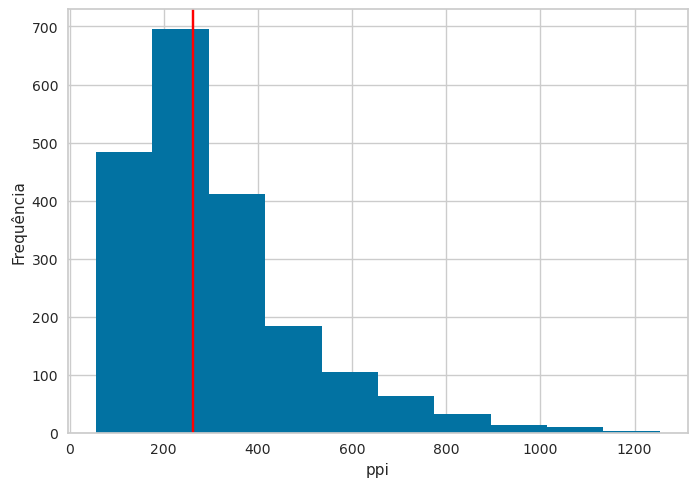

In [11]:
#criação da feature polegadas
celltrain['pol'] = ((celltrain['sc_w'] ** 2 + celltrain['sc_h'] ** 2) ** 0.5) / 2.54

#criação da feature pixels por polegada
celltrain['ppi'] = ((celltrain['px_width'] ** 2 + celltrain['px_height'] ** 2) ** 0.5) / celltrain['pol']
celltrain.head(5)

plt.hist(celltrain['ppi']);
plt.axvline(celltrain['ppi'].quantile(0.5), color='red')
plt.xlabel('ppi')
plt.ylabel('Frequência')

#### Observamos a seguir que os valores de ppi maiores do que 681 são exibidos como outliers, um valor bastante próximo ao que cogitamos anteriormente como dados suspeitos.

Max:681.723560295571
75p:380.8163334683285
25p:179.82817765779515
Min:56.416355049437755



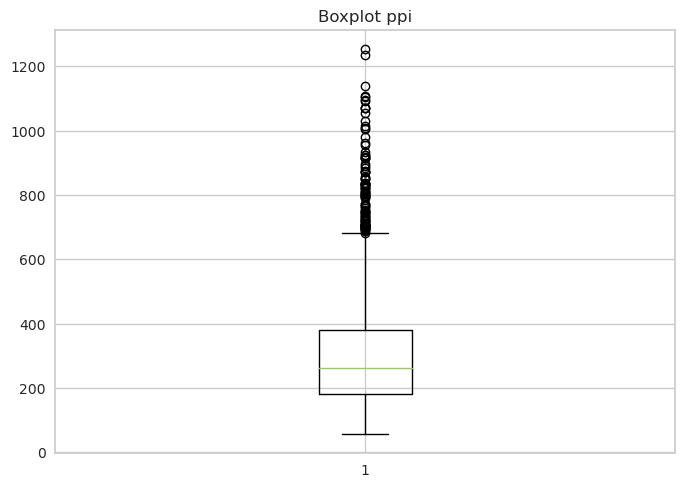

In [12]:
bp = plt.boxplot(celltrain['ppi']);
plt.title('Boxplot ppi')
bp_values = [item.get_ydata() for item in bp['whiskers']]
print(f'Max:{bp_values[1][1]}\n75p:{bp_values[1][0]}\n25p:{bp_values[0][0]}\nMin:{bp_values[0][1]}\n')

### Análise Exploratória de Dados
#### Analisamos a relação entre capacidade da bateria (battery power) e tempo de fala (talk time). Apresenta uma correlação interessante.

Correlação:0.40310101902598583


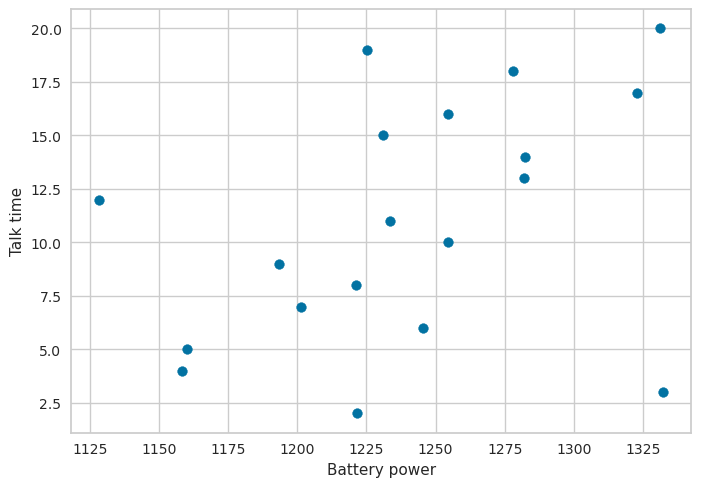

In [13]:
grp = celltrain.groupby(by=['talk_time'])['battery_power'].mean()
x = pd.Series(grp.index) #talk time
y = pd.Series(grp.values) #battery power
plt.scatter(y,x) #battery power x talk time
plt.xlabel('Battery power')
plt.ylabel('Talk time')
print(f'Correlação:{x.corr(y)}')

#### Analisamos a relação entre preço e memória RAM. Indentificamos uma elevada correlação. Com essa informação, podemos dizer que praticamente a memória RAM determina o preço do smartphone.

Correlação:0.999962246660744


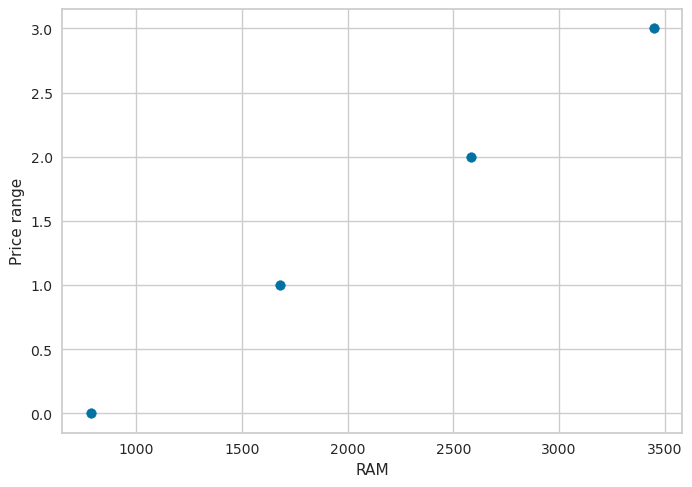

In [14]:
grp = celltrain.groupby(by=['price_range'])['ram'].mean()
x = pd.Series(grp.index)
y = pd.Series(grp.values)
plt.scatter(y,x)
plt.xlabel('RAM')
plt.ylabel('Price range')
print(f'Correlação:{x.corr(y)}')

#### Observamos a seguir que há telefones que possuem mais polegadas do que o maior celular já fabricado (Samsung Galaxy Z Fold 4 de 7.6 polegadas). Podem ser considerados como dados suspeitos.

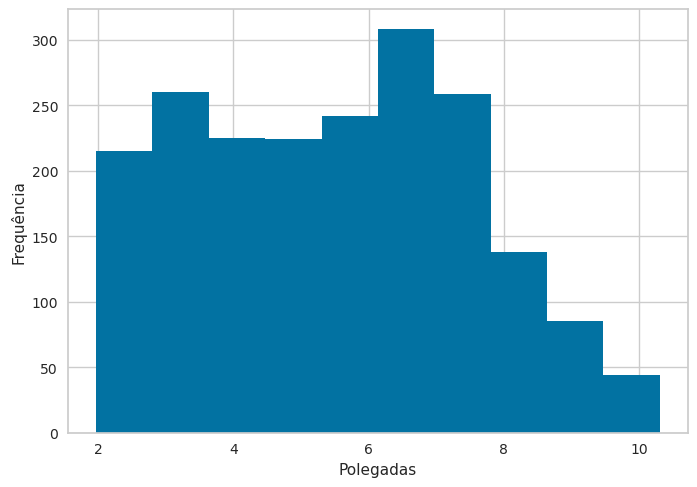

In [15]:
plt.hist(celltrain['pol'])
plt.xlabel('Polegadas');
plt.ylabel('Frequência');

Max:10.304135691576693
75p:7.042733787400913
25p:3.7349736143721017
Min:1.968503937007874



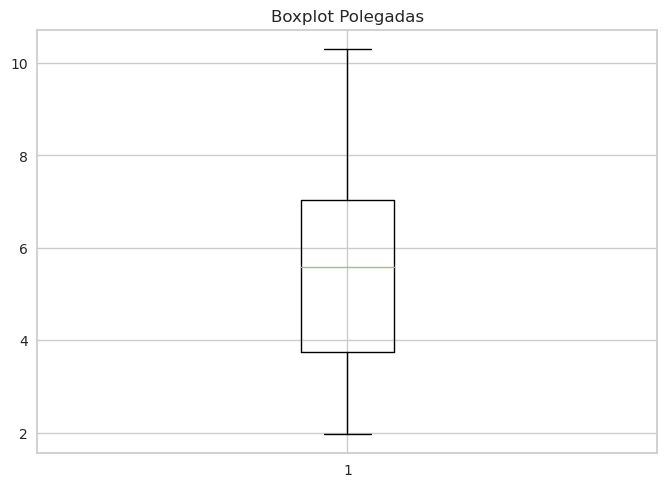

In [16]:
bp = plt.boxplot(celltrain['pol']);
plt.title('Boxplot Polegadas')
bp_values = [item.get_ydata() for item in bp['whiskers']]
print(f'Max:{bp_values[1][1]}\n75p:{bp_values[1][0]}\n25p:{bp_values[0][0]}\nMin:{bp_values[0][1]}\n')

#### A seguir, verifica-se a quantidade de outliers para cada feature. A feature 'three_g' há de ser desconsiderada por se tratar de valores binários (presença ou ausência de bluetooth), não fazendo sentido falar-se em outliers para essa feature.

In [17]:
#quantidade de outliers por cada feature
def outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        #quantidade de outliers
        nr_outliers = df.loc[(df[col] < LI) | (df[col] > LS)].shape[0]
        
        print(f'{col:<35}: {nr_outliers}')

outliers(celltrain,celltrain.columns)

battery_power                      : 0
blue                               : 0
clock_speed                        : 0
dual_sim                           : 0
fc                                 : 18
four_g                             : 0
int_memory                         : 0
m_dep                              : 0
mobile_wt                          : 0
n_cores                            : 0
pc                                 : 0
px_height                          : 2
px_width                           : 0
ram                                : 0
sc_h                               : 0
sc_w                               : 0
talk_time                          : 0
three_g                            : 477
touch_screen                       : 0
wifi                               : 0
price_range                        : 0
pol                                : 0
ppi                                : 102


### Pré-processamento: outliers
#### Pré processamento: realização de remoção dos outliers, por se tratar de poucos casos frente à quantidade total de aparelhos analisados.

In [18]:
def drop_outliers(df):
    cols2drop = ['fc', 'px_height', 'ppi']
    indexes2drop = []
    for col in cols2drop:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        indexes2drop.extend(list(df.loc[(df[col] < LI) | (df[col] > LS)].index))
        
    df_after_drop = celltrain.drop(indexes2drop, axis=0)
    return df_after_drop

celltrain_mod = drop_outliers(celltrain)
celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4.488880,168.475113
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.796329,321.394163
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.401709,484.058963
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.042734,306.792809
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.246540,527.084472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,5.354910,420.294822
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,5.852783,370.352162
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,3.565112,518.489087
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,8.106795,92.457066


### Pré-processamento: dados inconsistentes
- Removendo entradas inconsistentes que possuem celulares com dimensões nulas para a tela (sc_w = 0 ou sc_h = 0)
- Removendo entradas inconsistentes que possuem celulares com dimensões nulas para resolução de pixels em altura ou largura(px_height = 0 ou px_width = 0)
<!--     Removendo entradas inconsistentes que possuem celulares com espessura menor do que o celular mais fino já fabricado (4.75mm) -->
<!--     Removendo entradas inconsistentes que possuem celulares com resoluções em pixels menores que o menor valor já fabricado -->

In [19]:
celltrain_mod.drop(celltrain_mod[(celltrain_mod['sc_w'] == 0) | (celltrain_mod['sc_h'] == 0)].index, inplace = True)
celltrain_mod.drop(celltrain_mod[(celltrain_mod['px_height'] == 0) | (celltrain_mod['px_width'] == 0)].index, inplace = True)
celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4.488880,168.475113
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.796329,321.394163
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.401709,484.058963
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.042734,306.792809
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.246540,527.084472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,5.354910,420.294822
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,5.852783,370.352162
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,3.565112,518.489087
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,8.106795,92.457066


### Pré-processamento: normalização
#### As features a seguir serão normalizadas, visto que a maioria apresenta ordem de grandeza destoante das demais. Além do mais, escolheu-se a normalização porque não se pôde constatar que as distribuições apresentam algum comportamento gaussiano, conforme pudemos analisar em gráficos anteriores.

In [20]:
cols_2_normalize = ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'ppi']
for col in cols_2_normalize:
    celltrain_mod[col] = (celltrain_mod[col]-celltrain_mod[col].min())/(celltrain_mod[col].max()-celltrain_mod[col].min())
celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,0.227789,0,2.2,0,0.0625,0,0.080645,0.6,0.900000,0.142857,0.10,0.010000,0.171009,0.613102,0.285714,0.352941,0.944444,0,0,1,1,4.488880,0.179206
1,0.347361,1,0.5,1,0.0000,1,0.822581,0.7,0.466667,0.285714,0.30,0.475789,0.993988,0.635027,0.857143,0.117647,0.277778,1,1,0,2,6.796329,0.423756
2,0.041416,1,0.5,1,0.1250,1,0.629032,0.9,0.541667,0.571429,0.30,0.664211,0.812291,0.627540,0.428571,0.058824,0.388889,1,1,0,2,4.401709,0.683892
3,0.076152,1,2.5,0,0.0000,0,0.129032,0.8,0.425000,0.714286,0.45,0.639474,0.859051,0.671925,0.785714,0.411765,0.500000,1,0,0,2,7.042734,0.400406
4,0.881764,1,1.2,0,0.8125,1,0.677419,0.6,0.508333,0.142857,0.70,0.635263,0.475618,0.308824,0.214286,0.058824,0.722222,1,1,0,1,3.246540,0.752699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1,0.5,1,0.0000,1,0.000000,0.8,0.216667,0.714286,0.70,0.642632,0.928524,0.110160,0.571429,0.176471,0.944444,1,1,0,0,5.354910,0.581920
1996,0.977956,1,2.6,1,0.0000,0,0.596774,0.2,0.891667,0.428571,0.15,0.481053,0.978624,0.474866,0.428571,0.529412,0.777778,1,1,1,2,5.852783,0.502051
1997,0.941884,0,0.9,1,0.0625,1,0.548387,0.7,0.233333,1.000000,0.15,0.456316,0.756179,0.748930,0.285714,0.000000,0.166667,1,1,0,3,3.565112,0.738953
1998,0.675351,0,0.9,0,0.2500,1,0.709677,0.1,0.541667,0.571429,0.25,0.176316,0.113560,0.163904,0.928571,0.529412,0.944444,1,1,1,0,8.106795,0.057637


### Feature engineering: square root transform
#### Feature engineering: features positivamente enviesadas (fc, ph_height e sc_w) aproximadas à curva normal por meio de aplicação de transformação raiz quadrada.

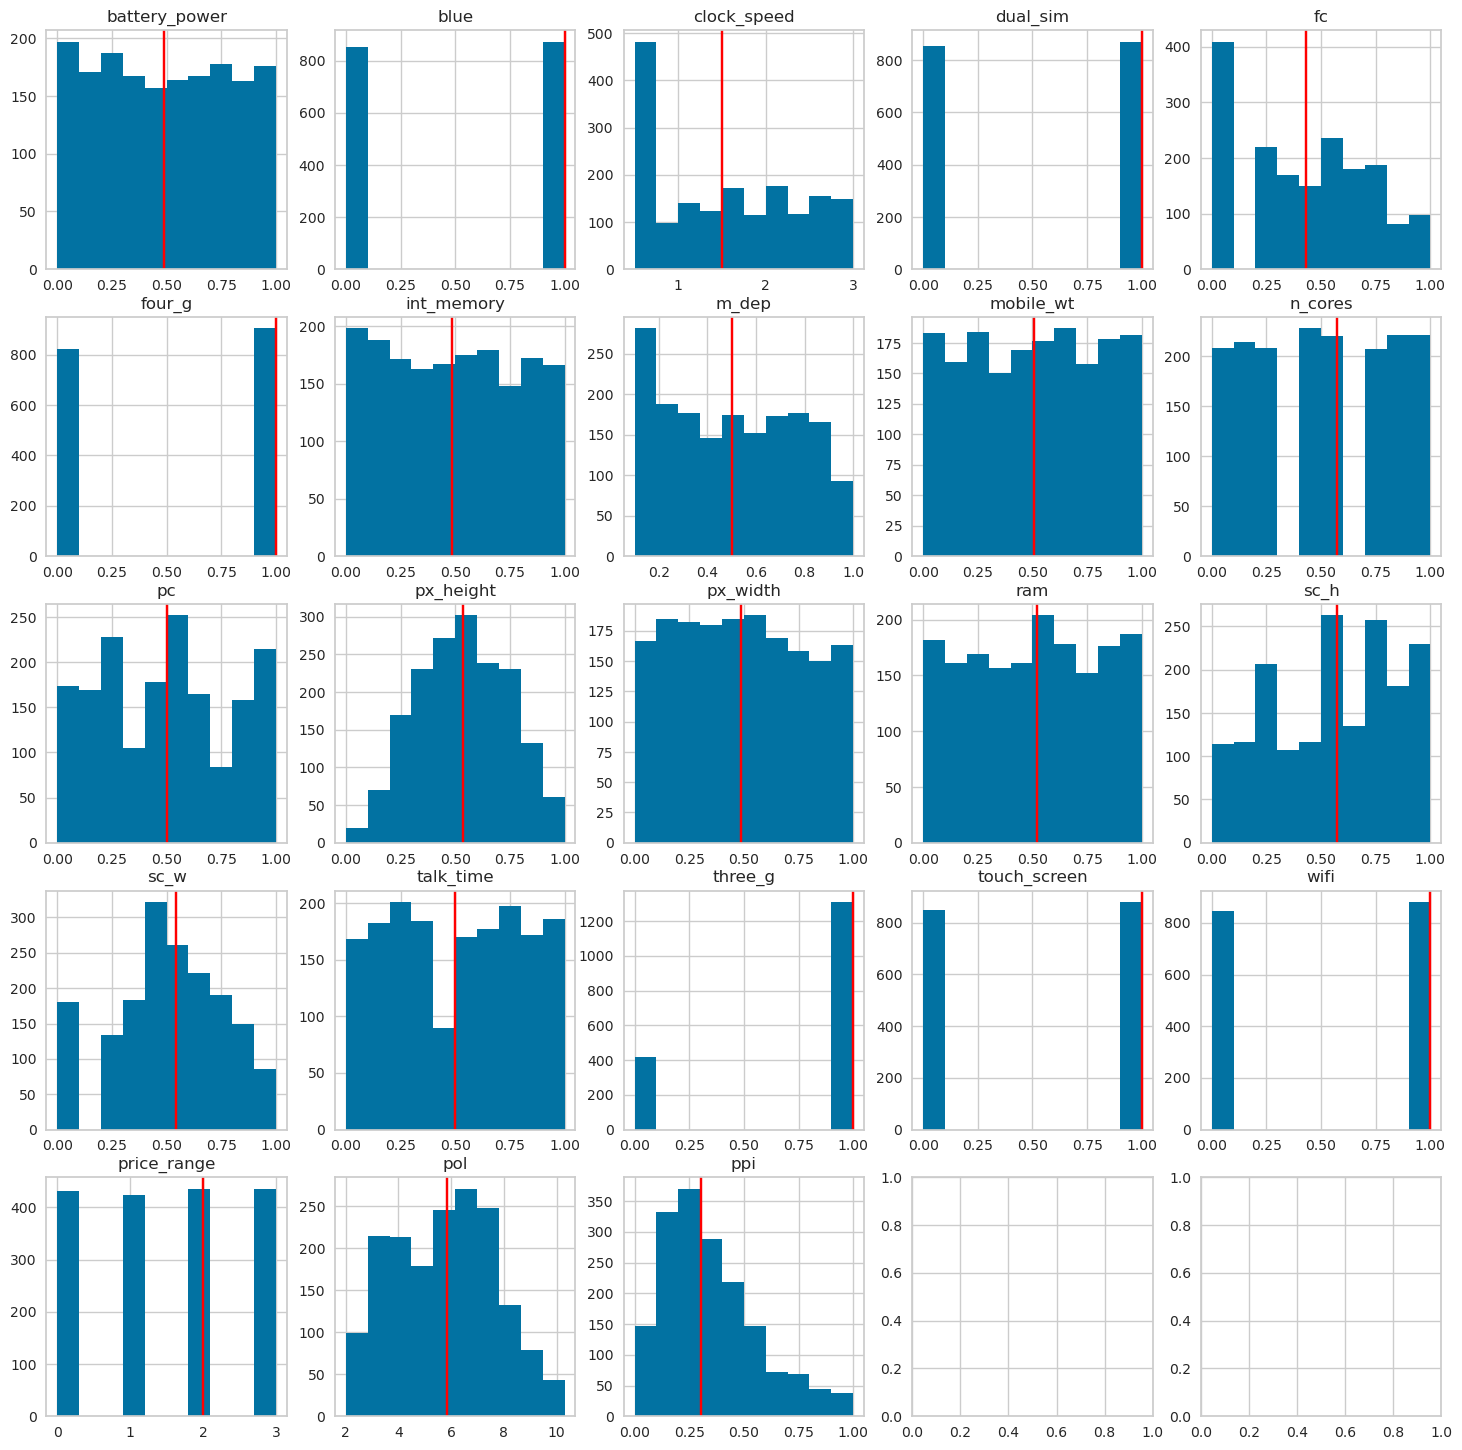

In [21]:
celltrain_mod['fc'] = np.sqrt(celltrain_mod['fc'])
celltrain_mod['px_height'] = np.sqrt(celltrain_mod['px_height'])
celltrain_mod['sc_w'] = np.sqrt(celltrain_mod['sc_w'])
plot_histograms(celltrain_mod)

### Análise Exploratória de Dados (EDA)
#### Plotando alguns atributos numéricos em relação a qualquer outro atributo numérico
- Matriz de dispersão


array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_height', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>,
        <AxesSubplot:xlabel='pol', ylabel='price_range'>,
        <AxesSubplot:xlabel='ppi', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>,
        <AxesSubplot:xlabel='pol', ylabel='ram'>,
        <AxesSubplot:xlabel='ppi', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_height'>,
        <AxesSubplot:xlabel='ram', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_height'>,
        <AxesSubplot:xlabel='pol', ylabel='px_height'>,
        <Axes

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


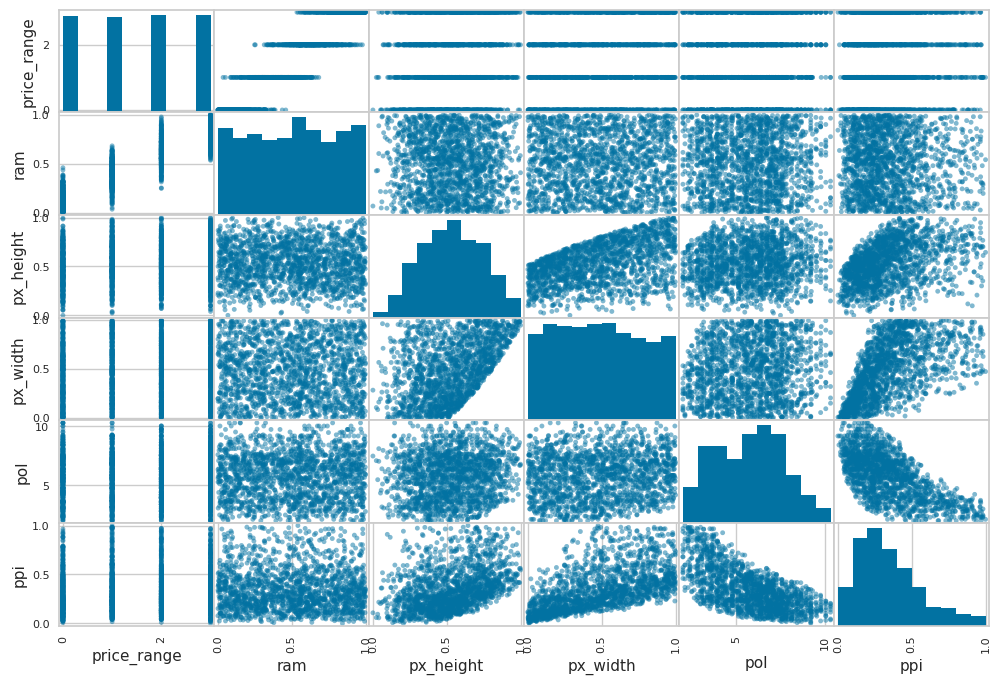

In [22]:
attributes = ['price_range', 'ram', 'px_height', 'px_width', 'pol', 'ppi']
scatter_matrix(celltrain_mod[attributes], figsize=(12,8))

### Observando correlação entre px_height e px_width
- Quanto maior a altura do dispositivo maior o comprimento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='px_height', ylabel='px_width'>

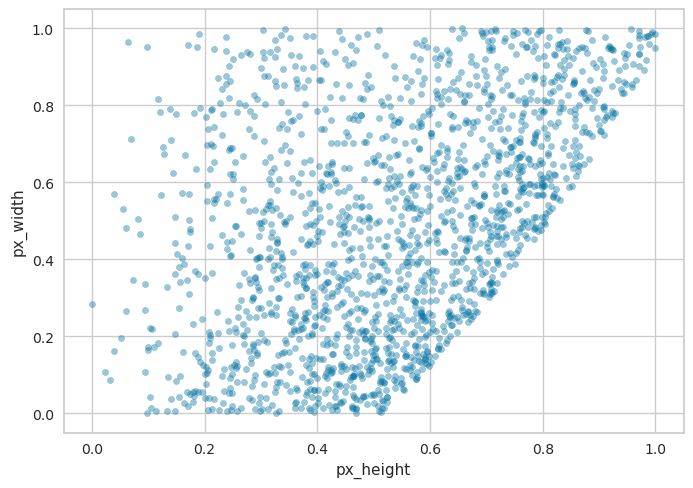

In [23]:
celltrain_mod.plot(kind='scatter', x='px_height', y='px_width', alpha=0.4)

### Mapa de calor com correlações
#### Destaques: 
- price_range e ram
- sc_h e pol

<AxesSubplot:>

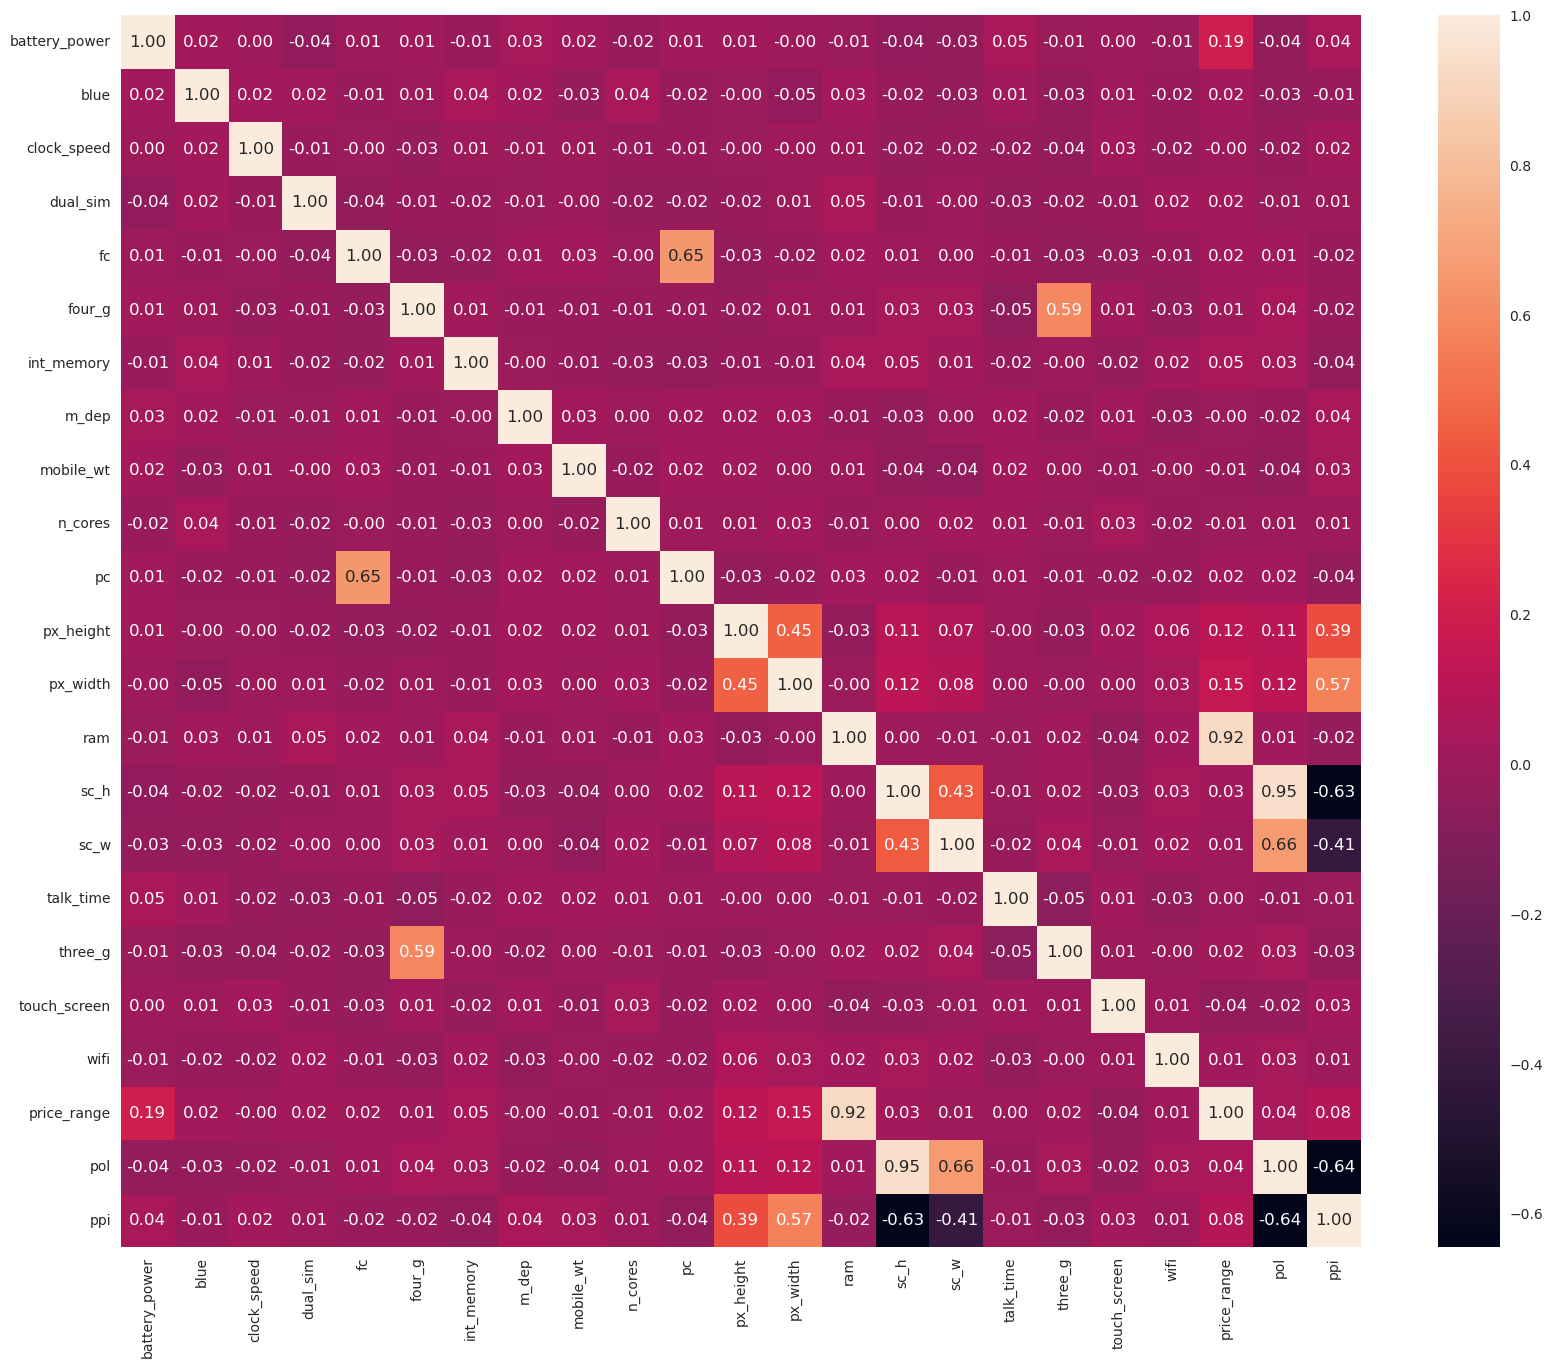

In [24]:
df_corr = celltrain_mod.corr()
plt.figure(figsize=(20,16), dpi=100)
sns.heatmap(data=df_corr, annot=True, fmt='.2f')

### Verificando correlação após criação de novas features

In [25]:
df_corr['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.919202
battery_power    0.191818
px_width         0.154484
px_height        0.124173
ppi              0.081283
int_memory       0.047631
pol              0.040735
sc_h             0.029493
blue             0.023986
dual_sim         0.022964
fc               0.020480
pc               0.019958
three_g          0.016360
wifi             0.013595
four_g           0.011386
sc_w             0.005087
talk_time        0.002874
clock_speed     -0.001102
m_dep           -0.003184
n_cores         -0.006358
mobile_wt       -0.010399
touch_screen    -0.040702
Name: price_range, dtype: float64

### Análise Exploratória de Dados (EDA)
#### Observa-se a seguir que dispositivos de baixo custo se concentram em baixa capacidade de bateria e baixa memória RAM. Já os dispositivos de muito alto custo se concentram em alta capacidade de bateria e alta memória RAM.

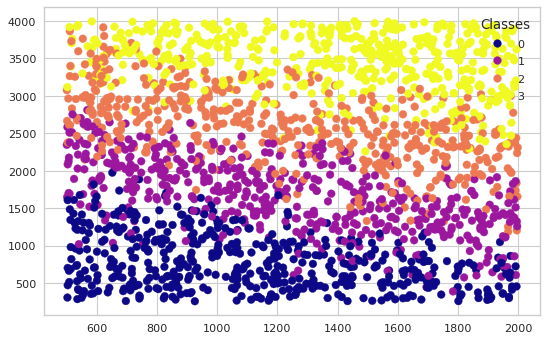

In [26]:
plt.figure(figsize=(8, 5), dpi=80)
scatter = plt.scatter(celltrain['battery_power'],celltrain['ram'], c = celltrain['price_range'], label = celltrain['price_range'], cmap='plasma')
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")


In [27]:
count_row = celltrain.shape[0]
count_col = celltrain.shape[1]

print(count_row)
print(count_col)

2000
23


In [28]:
print('Total de registros range de preços classificados = 0 (low cost)', celltrain[celltrain['price_range'] == 0].shape[0])
print('Total de registros range de preços classificados = 1 (medium cost)', celltrain[celltrain['price_range'] == 1].shape[0])
print('Total de registros range de preços classificados = 2 (high cost)', celltrain[celltrain['price_range'] == 2].shape[0])
print('Total de registros range de preços classificados = 3 (very high cost)', celltrain[celltrain['price_range'] == 3].shape[0])

Total de registros range de preços classificados = 0 (low cost) 500
Total de registros range de preços classificados = 1 (medium cost) 500
Total de registros range de preços classificados = 2 (high cost) 500
Total de registros range de preços classificados = 3 (very high cost) 500


In [29]:
Y = celltrain['price_range'].values

print(Y)

[1 2 2 ... 3 0 3]


In [30]:
X = celltrain[[
"battery_power", 
"blue", 
"clock_speed", 
"dual_sim",      
"fc",
"four_g",        
"int_memory",    
"m_dep",         
"mobile_wt",     
"n_cores",       
"pc",
"px_height",     
"px_width",      
"ram",
"sc_h",
"sc_w",
"talk_time",     
"three_g",       
"touch_screen",  
"wifi",   
"pol",
"ppi"
]].values

print(X)

[[8.42000000e+02 0.00000000e+00 2.20000000e+00 ... 1.00000000e+00
  4.48887963e+00 1.68475113e+02]
 [1.02100000e+03 1.00000000e+00 5.00000000e-01 ... 0.00000000e+00
  6.79632933e+00 3.21394163e+02]
 [5.63000000e+02 1.00000000e+00 5.00000000e-01 ... 0.00000000e+00
  4.40170862e+00 4.84058963e+02]
 ...
 [1.91100000e+03 0.00000000e+00 9.00000000e-01 ... 0.00000000e+00
  3.56511226e+00 5.18489087e+02]
 [1.51200000e+03 0.00000000e+00 9.00000000e-01 ... 1.00000000e+00
  8.10679539e+00 9.24570664e+01]
 [5.10000000e+02 1.00000000e+00 2.00000000e+00 ... 1.00000000e+00
  7.64428655e+00 1.17137897e+02]]


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [63]:
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [64]:
model = decisionTree.fit(X_train, Y_train)

In [65]:
print('Acurácia da Árvore:', accuracy_score(Y_test, Y_predicoes))
print(classification_report(Y_test, Y_predicoes))

Acurácia da Árvore: 0.9725
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       0.99      0.93      0.96       105
           2       0.95      0.97      0.96        96
           3       0.98      0.99      0.99       105

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [169]:
text_representation = tree.export_text(decisionTree)
print(text_representation)

|--- feature_13 <= 2247.00
|   |--- feature_13 <= 1175.50
|   |   |--- feature_0 <= 1268.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1268.50
|   |   |   |--- class: 0
|   |--- feature_13 >  1175.50
|   |   |--- feature_0 <= 1112.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1112.50
|   |   |   |--- class: 1
|--- feature_13 >  2247.00
|   |--- feature_13 <= 3013.00
|   |   |--- feature_0 <= 1364.50
|   |   |   |--- class: 2
|   |   |--- feature_0 >  1364.50
|   |   |   |--- class: 2
|   |--- feature_13 >  3013.00
|   |   |--- feature_0 <= 1342.00
|   |   |   |--- class: 3
|   |   |--- feature_0 >  1342.00
|   |   |   |--- class: 3



In [170]:
features_name = [
"battery_power", 
"blue", 
"clock_speed", 
"dual_sim",      
"fc",
"four_g",        
"int_memory",    
"m_dep",         
"mobile_wt",     
"n_cores",       
"pc",
"px_height",     
"px_width",      
"ram",
"sc_h",
"sc_w",
"talk_time",     
"three_g",       
"touch_screen",  
"wifi",   
"pol",
"ppi"      
]

class_name = str(model.classes_)

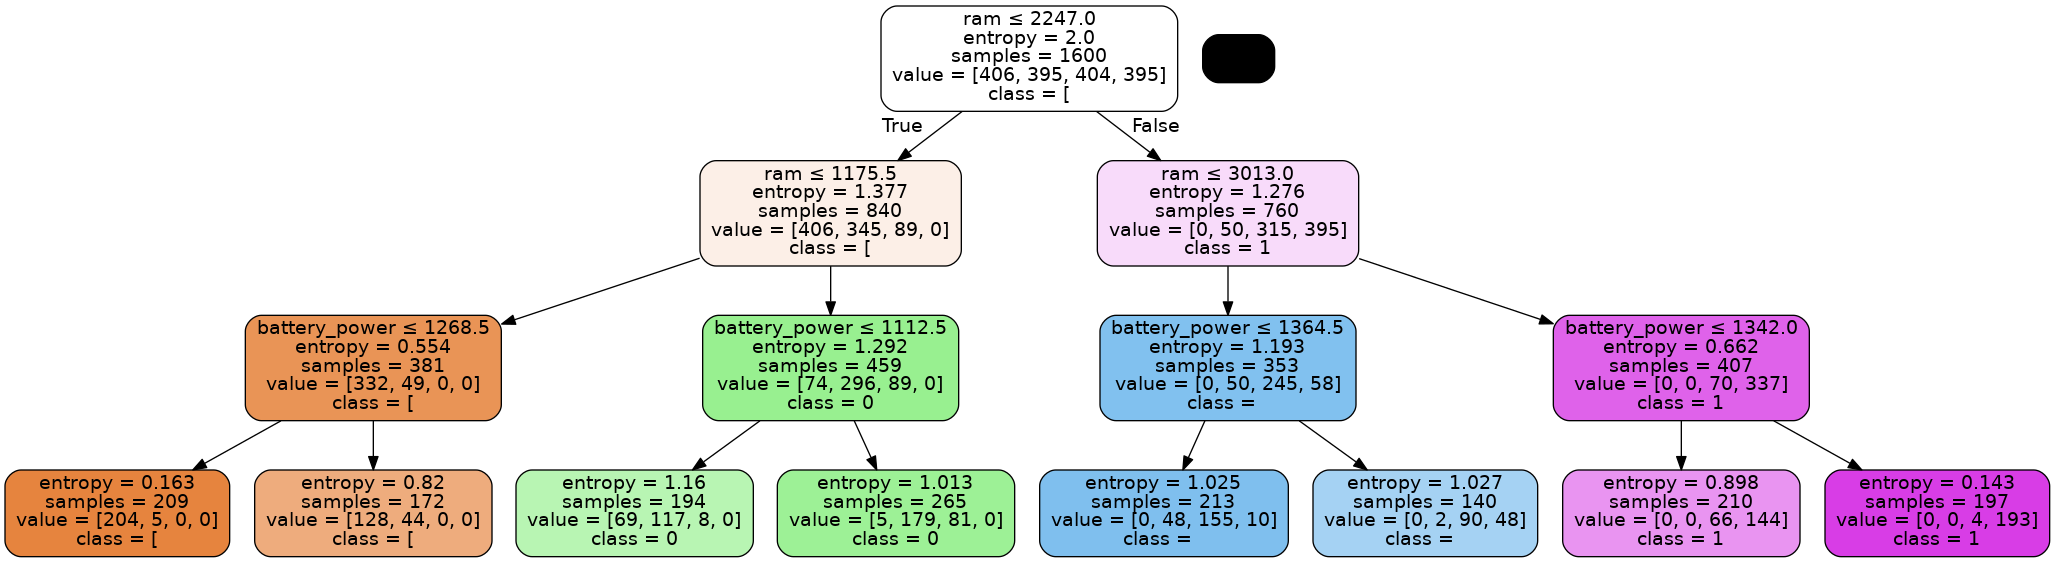

In [171]:
dot_data = StringIO()

export_graphviz(
    model, 
    out_file=dot_data, 
    filled=True, 
    feature_names=features_name, 
    class_names=class_name, 
    rounded=True, 
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")

Image('arvore.png')

Feature ranking:
1. feature 13 (0.873568)
2. feature 0 (0.126432)
3. feature 9 (0.000000)
4. feature 1 (0.000000)
5. feature 2 (0.000000)
6. feature 3 (0.000000)
7. feature 4 (0.000000)
8. feature 5 (0.000000)
9. feature 6 (0.000000)
10. feature 7 (0.000000)
11. feature 8 (0.000000)
12. feature 21 (0.000000)
13. feature 20 (0.000000)
14. feature 11 (0.000000)
15. feature 12 (0.000000)
16. feature 14 (0.000000)
17. feature 15 (0.000000)
18. feature 16 (0.000000)
19. feature 17 (0.000000)
20. feature 18 (0.000000)
21. feature 19 (0.000000)
22. feature 10 (0.000000)


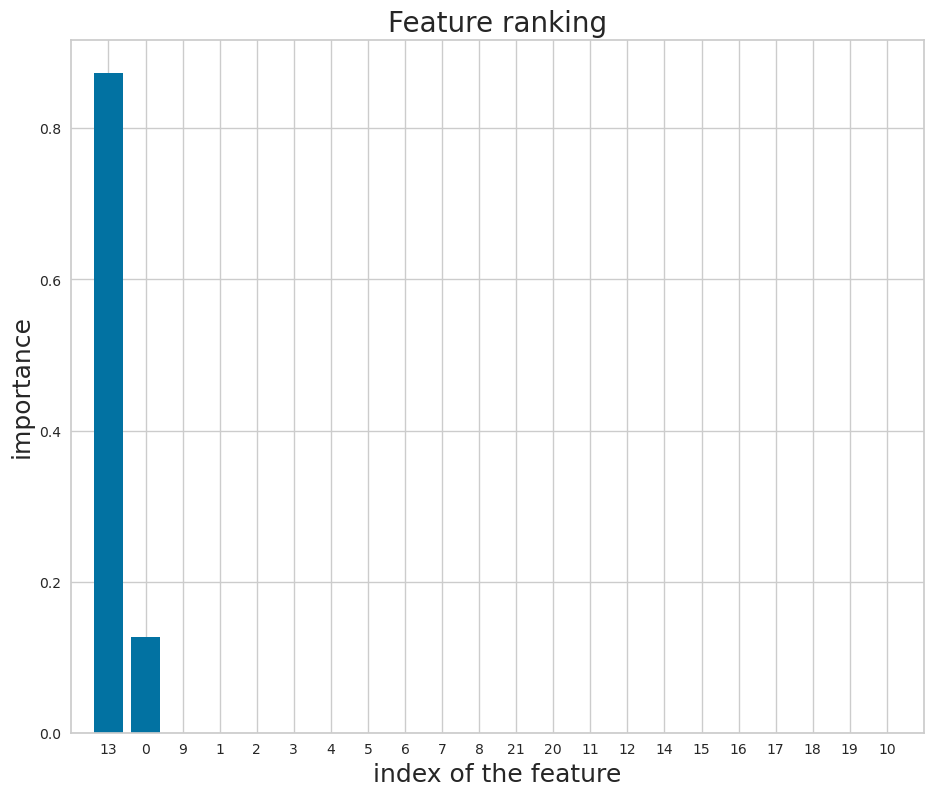

In [173]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

In [174]:
Y_predicoes = model.predict(X_test)

In [177]:
print('Acurácia da Árvore:', accuracy_score(Y_test, Y_predicoes))
print(classification_report(Y_test, Y_predicoes))

Acurácia da Árvore: 0.785
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        94
           1       0.71      0.76      0.73       105
           2       0.74      0.57      0.65        96
           3       0.84      0.90      0.87       105

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.79      0.78       400



Matriz de Confusão sem normalizacão 
[[84 10  0  0]
 [16 80  9  0]
 [ 0 23 55 18]
 [ 0  0 10 95]]


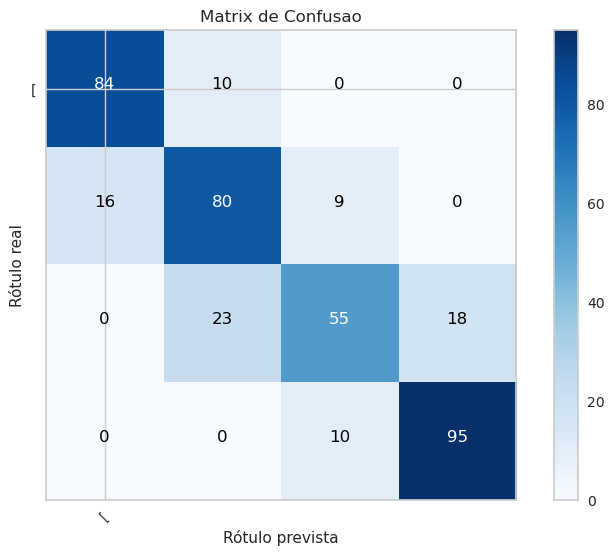

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_test, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=class_name[0], title='Matrix de Confusao')

### Aplicação de modelos não supervisionados

In [62]:
celltrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'pol', 'ppi'],
      dtype='object')

#### Elbow Method:
    
- Exploração dos valores de k que melhor traduzem os clusters. Observe que para k = 3 temos um suposto valor ótimo, visto que para valores maiores de k aumentaremos bastante o custo computacional para uma muito baixa redução do erro quadrático (custo).

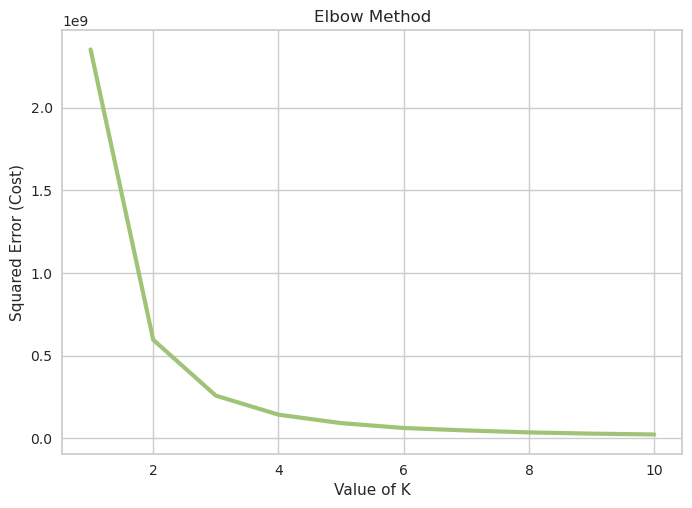

In [63]:
def elbow_method(X,title):
    cost =[]
    for i in range(1, 11):
        KM = KMeans(n_clusters = i, max_iter = 500, n_init=10)
        KM.fit(X)

        # calculates squared error
        # for the clustered points
        cost.append(KM.inertia_)    

    # plot the cost against K values
    plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
    plt.title(title)
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
elbow_method(celltrain[['ram','price_range']], 'Elbow Method')

### KMeans
    
- Observe a seguir que dispositivos com memória RAM entre 256 e 1500 predominam para valores de baixo e médio custo. Dispositivos com memória RAM entre 1500 e 2700 predominam entre médio e alto custo. Já os dispositivos que possuem memória RAM acima de 2700 predominam entre alto e muito alto custo.

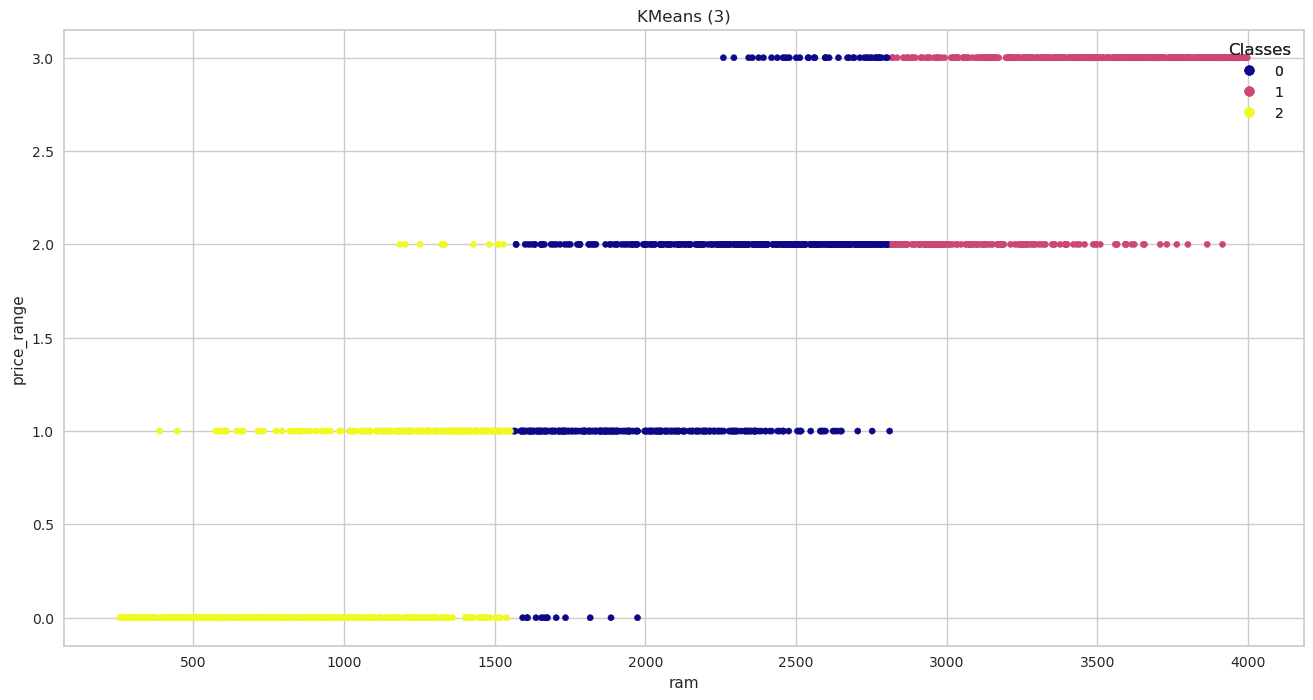

In [64]:
xcol = 'ram'
ycol = 'price_range'
k = 3

X = celltrain[[xcol, ycol]]
kmeans = KMeans(n_clusters = k, n_init=10)
kmeans.fit(X)
predictions = kmeans.predict(X)

fig, axs = plt.subplots(1,1,figsize = (16,8))
scatter = axs.scatter(celltrain[xcol], celltrain[ycol], c=predictions, s=20, cmap='plasma')
axs.set_title(f'KMeans ({k})')
legend1 = axs.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
axs.add_artist(legend1)
axs.set_xlabel(xcol)
axs.set_ylabel(ycol);


### Silhouette Analysis:
    
Mede o quão um elemento é similar ao cluster a que pertence (coesão) em relação a outros clusters (separação). O silhouette score varia de [-1,1], sendo que valores mais próximos de 1 indicam que o elemento está muito bem identificado ao próprio cluster a que pertence em relação aos demais clusters. Observe que para todas as plotagens de silhouette, cada cluster (em cada plotagem) apresenta valores maiores do que a média do silhouette score (linha pontilhada vermelha), o que é um bom sinal de que os elementos estão bem acomodados a seus clusters de origem. Os clusters apresentam uma espessura semelhante, indicando que apresentam dimensões semelhantes em quantidade de elementos. Clusters mais pontiagudos refletem piores cenários, pois haverá mais elementos "indecisos" pertencentes àquele cluster, pois maior a probabilidade de estarem abaixo do silhouette score.

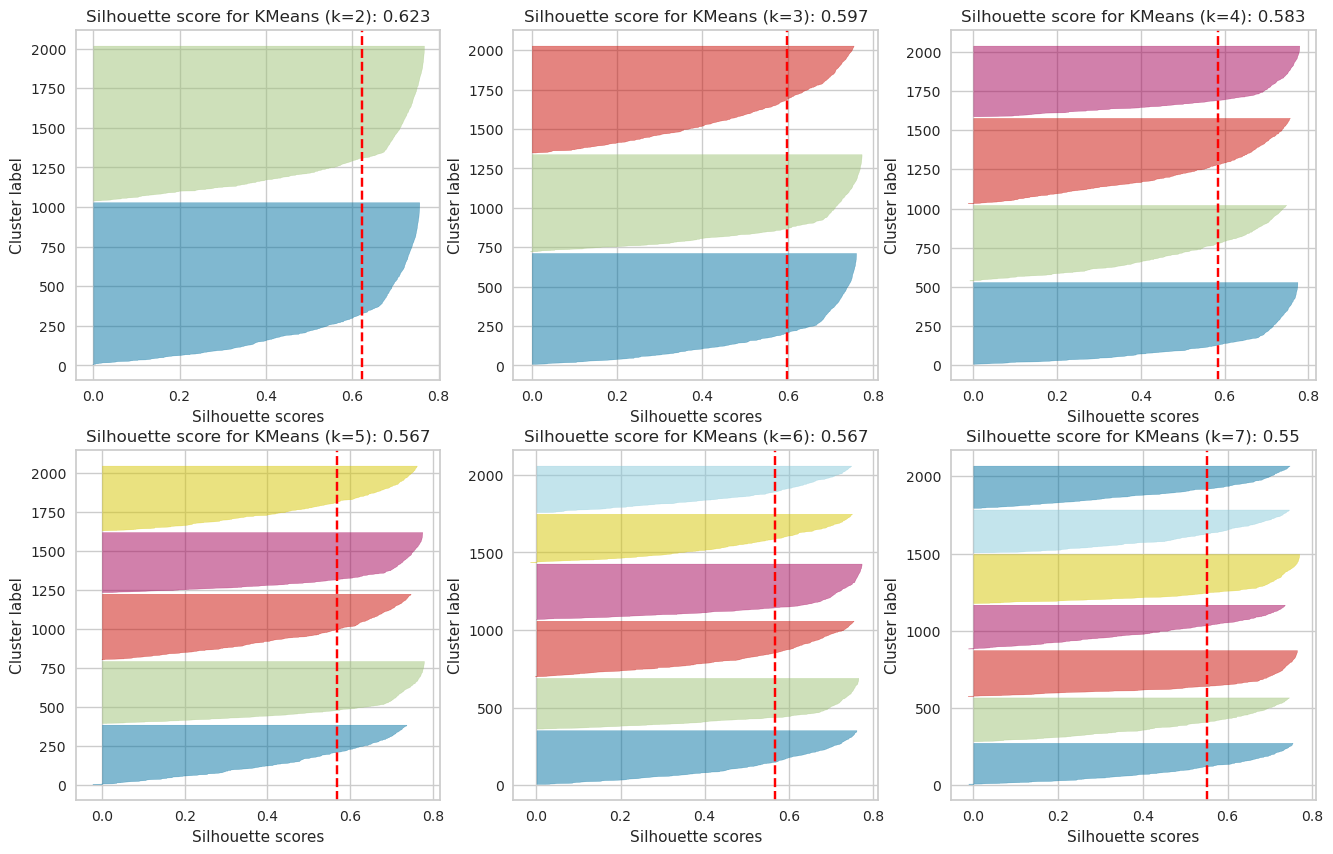

In [65]:
def plot_silhouette(X, kmin, kmax):
    fig, axs = plt.subplots(2,3,figsize=(16,10))
    for i,k in enumerate(range(kmin,kmax)):
        kmeans = KMeans(n_clusters = k, n_init=10)
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax = axs[i//3,i%3], )
        visualizer.fit(X)  
        score = silhouette_score(X, kmeans.labels_, metric='euclidean')
        axs[i//3,i%3].set_title(f'Silhouette score for KMeans (k={k}): {round(score,3)}')
        axs[i//3,i%3].set_xlabel('Silhouette scores')
        axs[i//3,i%3].set_ylabel('Cluster label')
        
plot_silhouette(celltrain[['ram','price_range']], 2, 8)

### DBSCAN
    
A análise a seguir revela que há um grande cluster que abraça dispositivos com ppi entre 150 e 380, abrangendo praticamente todas as dimensões de smartphones em polegadas. Em outras palavras, independentemente do tamanho do telefone, são produzidos aparelhos com ppi entre 150 e 380 com maior frequência, sendo uma solução comercial para a maioria dos usuários do mercado. A partir de ppi > 380, ou seja, aparelhos mais refinados e com display de maior qualidade, pode-se afirmar que os sucessivos grupos abrangem parcelas menores de smartphones, concentrando-se em aparelhos de dimensões cada vez mais reduzidas, mas com melhor fluidez de imagem.

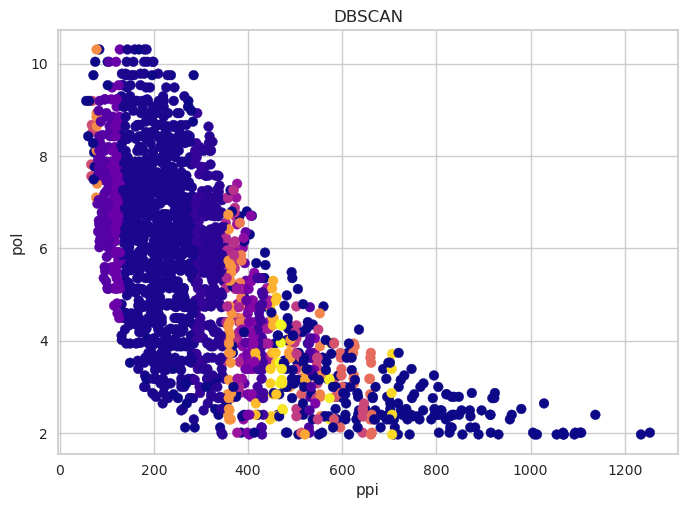

In [66]:
# ff = mdf[mdf['Distancia'] <= 1000]
xcol = 'ppi'
ycol = 'pol'
clusters = DBSCAN(eps=1.7, min_samples=5).fit(celltrain[[xcol,ycol]])
plt.scatter(celltrain[xcol], celltrain[ycol], c = clusters.labels_, cmap='plasma')
plt.title('DBSCAN');
plt.xlabel('ppi')
plt.ylabel('pol');

### Performance: dados não tratados
A seguir, performance dos modelos nos dados não tratados.

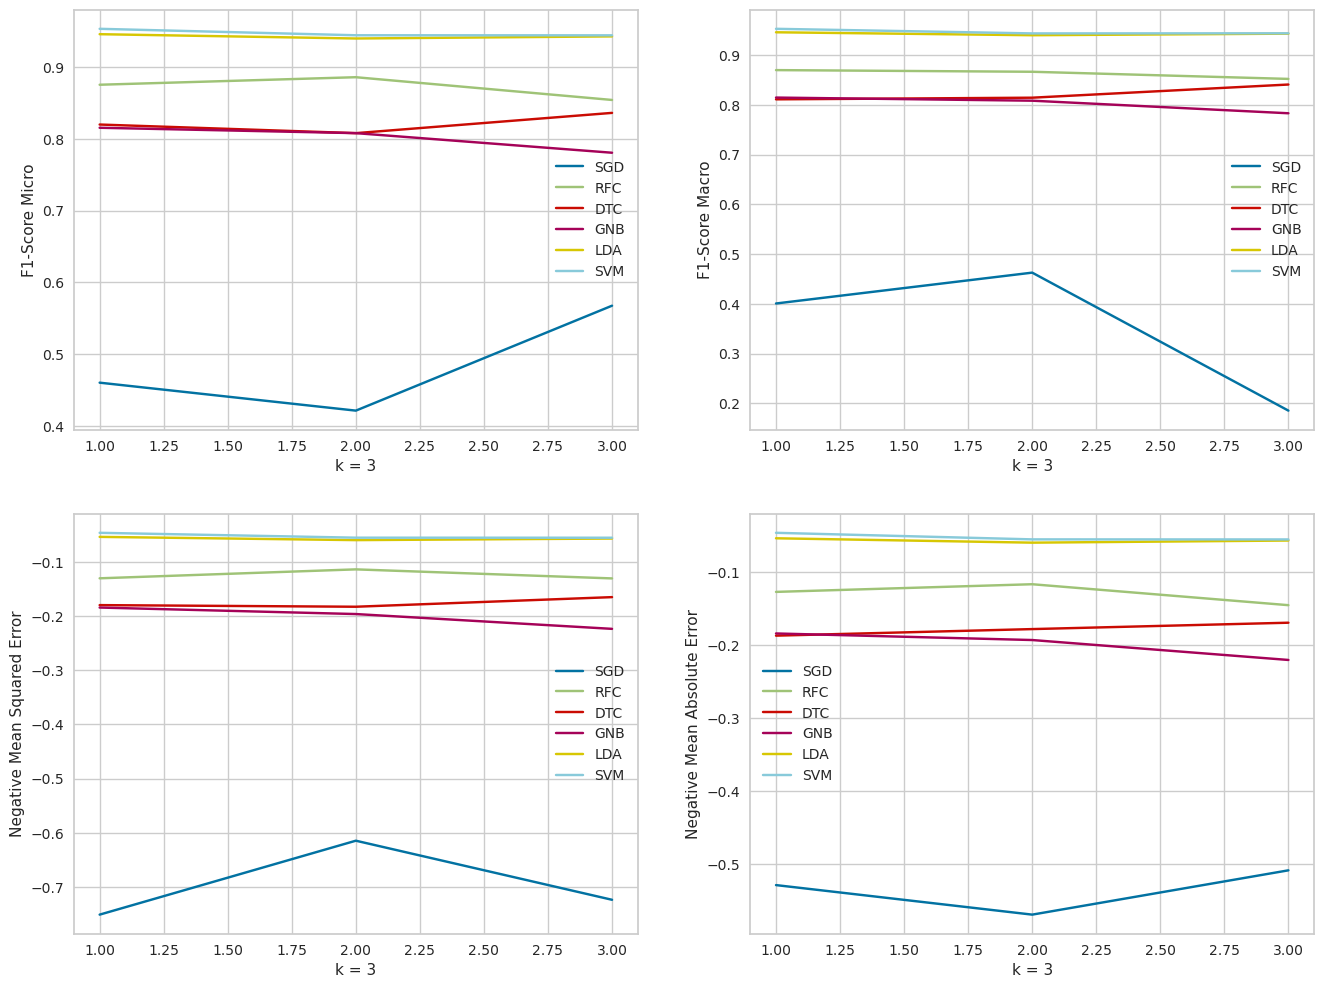

In [70]:
#one hot encoding em colunas categóricas
# categorical_cols = [i for i in categorical_features if i != 'price_range']
# df_dum = pd.get_dummies(data=cellphone_data_train, columns=categorical_cols)

#separação em treino e teste
X = celltrain.drop(['price_range'], axis=1)
y = celltrain['price_range']

modelos = []
#modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('SGD', SGDClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
# modelos.append(('LR', LogisticRegression(max_iter=1000)))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

fig, axs = plt.subplots(2,2, figsize=(16,12))
for modelo in modelos:
    splits = 3
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=splits)
    
    resultados_f1_micro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_micro')
    resultados_f1_macro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_macro')
    resultados_mse = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_squared_error')
    resultados_abs = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_absolute_error')
    
    plot = axs[0,0].plot([k+1 for k in range(splits)], resultados_f1_micro, label=nome)
    axs[0,0].set_xlabel(f'k = {splits}')
    axs[0,0].set_ylabel(f'F1-Score Micro')
    axs[0,0].legend(loc = 'best')
    
    plot = axs[0,1].plot([k+1 for k in range(splits)], resultados_f1_macro, label=nome)
    axs[0,1].set_xlabel(f'k = {splits}')
    axs[0,1].set_ylabel(f'F1-Score Macro')
    axs[0,1].legend(loc = 'best')
    
    plot = axs[1,0].plot([k+1 for k in range(splits)], resultados_mse, label=nome)
    axs[1,0].set_xlabel(f'k = {splits}')
    axs[1,0].set_ylabel(f'Negative Mean Squared Error')
    axs[1,0].legend(loc = 'best')
    
    plot = axs[1,1].plot([k+1 for k in range(splits)], resultados_abs, label=nome)
    axs[1,1].set_xlabel(f'k = {splits}')
    axs[1,1].set_ylabel(f'Negative Mean Absolute Error')
    axs[1,1].legend(loc = 'best')

    #print(f'F1-Score micro de {nome}: {resultados_f1_micro.mean()}')
    #print(f'F1-Score macro de {nome}: {resultados_f1_macro.mean()}')
    #print(f'MSE de {nome}: {resultados_mse.mean()}')
    #print(f'ABS de {nome}: {resultados_abs.mean()}\n')

### Performance: dados tratados
A seguir, perfomance dos modelos nos dados tratados. Observa-se que a maior parte dos modelos teve um desempenho pior.

In [73]:
X = celltrain_mod.drop(['price_range'], axis=1)
y = celltrain_mod['price_range']

modelos = []
#modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('SGD', SGDClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('LR', LogisticRegression(max_iter=1000)))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

for modelo in modelos:
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=3)

    resultados_f1_micro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_micro')
    resultados_f1_macro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_macro')
    resultados_mse = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_squared_error')
    resultados_abs = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_absolute_error')

    nrformat = 20
    print(f'F1-Score micro de {nome}: {resultados_f1_micro.mean()}')
    print(f'F1-Score macro de {nome}: {resultados_f1_macro.mean()}')
    print(f'MSE de {nome}: {resultados_mse.mean()}')
    print(f'ABS de {nome}: {resultados_abs.mean()}\n')

F1-Score micro de SGD: 0.7075825281803542
F1-Score macro de SGD: 0.6202354842013795
MSE de SGD: -0.343341384863124
ABS de SGD: -0.2733212560386473

F1-Score micro de RFC: 0.8720279790660225
F1-Score macro de RFC: 0.8600179456712865
MSE de RFC: -0.1378250805152979
ABS de RFC: -0.13956219806763284

F1-Score micro de LR: 0.8882467793880838
F1-Score macro de LR: 0.8869232063632678
MSE de LR: -0.11175322061191627
ABS de LR: -0.11175322061191627

F1-Score micro de DTC: 0.818161231884058
F1-Score macro de DTC: 0.8106956412223522
MSE de DTC: -0.1870481078904992
ABS de DTC: -0.1864623590982287

F1-Score micro de GNB: 0.8042723429951691
F1-Score macro de GNB: 0.804295379647566
MSE de GNB: -0.19746678743961352
ABS de GNB: -0.19630736714975847

F1-Score micro de LDA: 0.9357196054750402
F1-Score macro de LDA: 0.936054924065461
MSE de LDA: -0.06428039452495975
ABS de LDA: -0.06428039452495975

F1-Score micro de SVM: 0.7035014090177133
F1-Score macro de SVM: 0.7090554556920358
MSE de SVM: -0.30171296

### Curva de Aprendizado (Learning Curve) - dados não tratados
- Observamos a seguir que em praticamente todas as curvas de aprendizado, a acurácia dos dados de treino (azul) é superior à dos dados de teste (verde); 
- Como as curvas abaixo refletem o tamanho dos dados de treino versus acurácia, podemos afirmar que quanto mais elevados os gráficos (maior acurácia); 
- Quanto mais próximos estiverem (low variance);
- Menores as áreas sombreadas (menor desvio padrão), melhor será o modelo; 
- Assim, podemos afirmar, por exemplo, que os algoritmos RFC e DTC estão longe de estabelecer um equilíbrio entre treino e teste, podendo simbolizar um underfitting: embora os dados de teste apresentem uma tendência de melhora, aparenta-se que o algoritmo tenha sido interrompido antes da hora; 
- O algoritmo KNN parece sofrer de underfitting, visto a distância entre acurácia de treino e de teste. Mais instâncias poderiam ser uma solução, talvez;
- Os algoritmos GNB, LDA e SVM apresentam um exemplo de bom comportamento, pois tendem a crescer e se aproximar em tendência de equilíbrio, com destaque para o SVM.

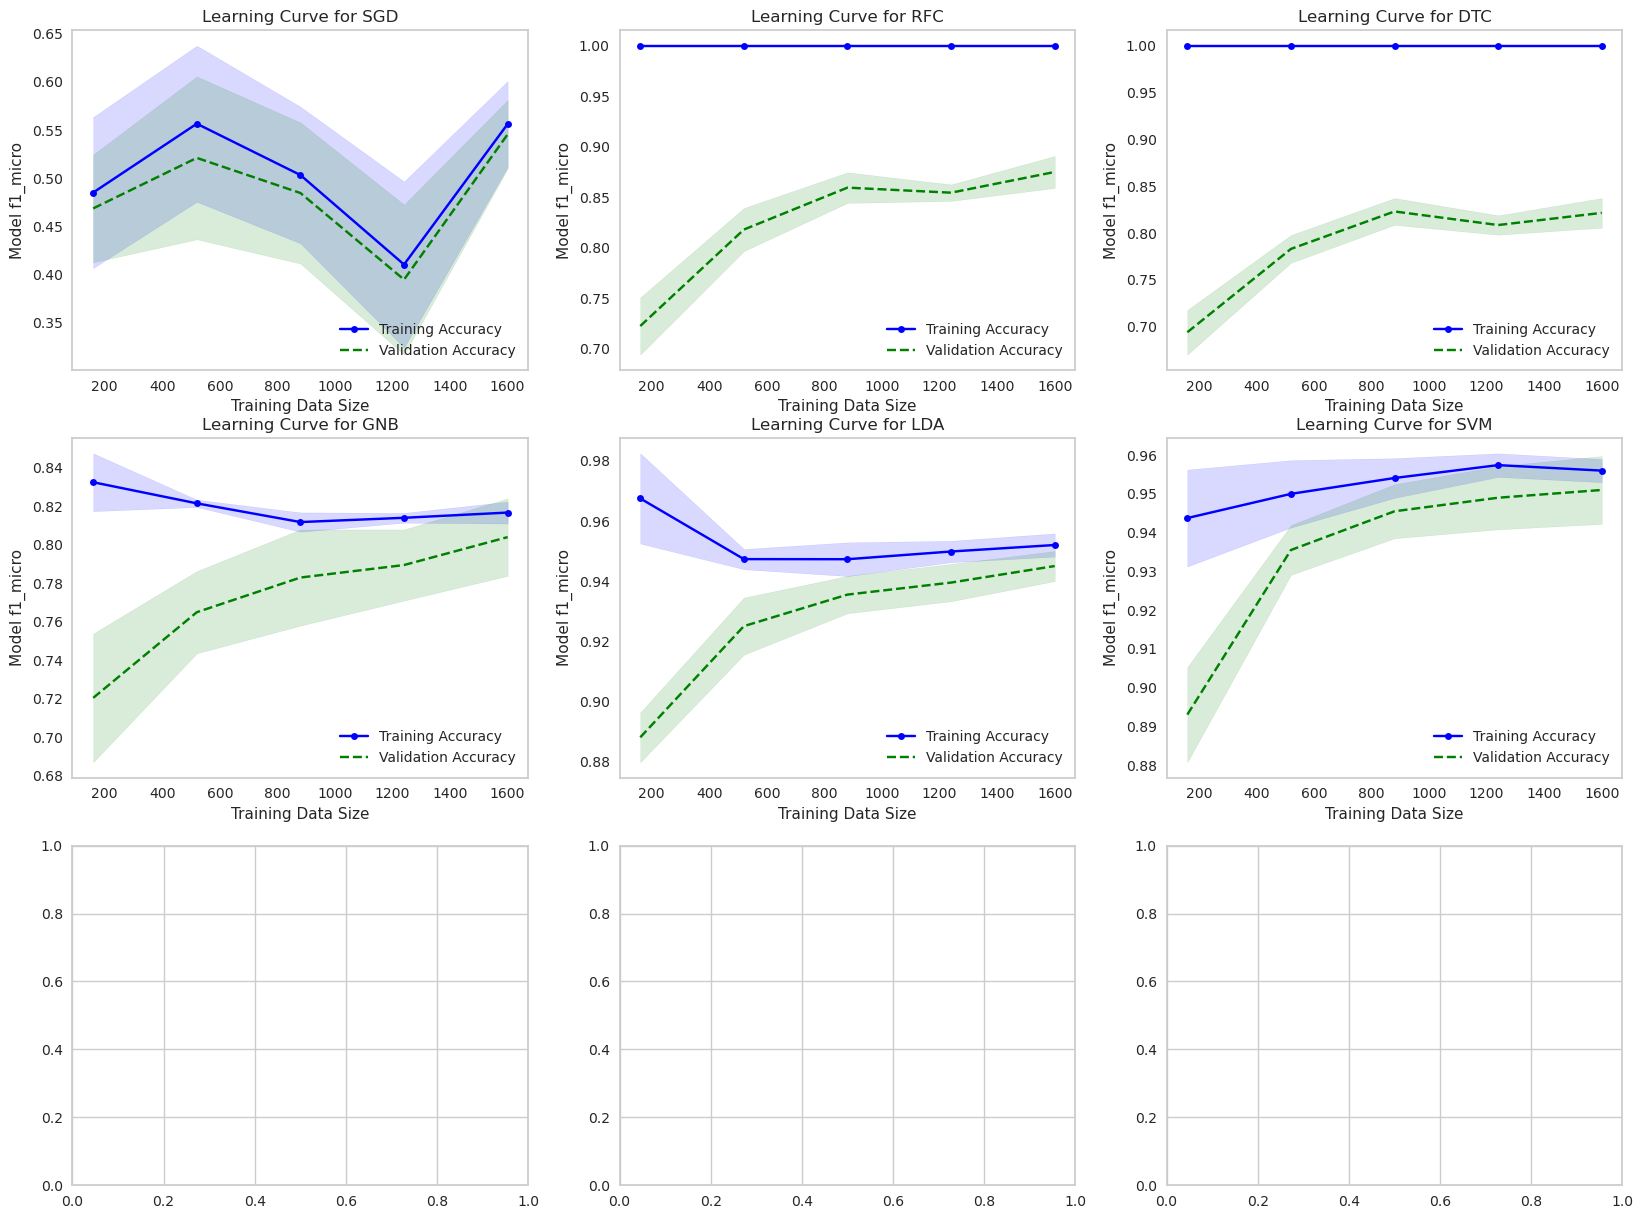

In [76]:
X = celltrain.drop(['price_range'], axis=1)
y = celltrain['price_range']

modelos = []
#modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('SGD', SGDClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
# modelos.append(('LR', LogisticRegression(max_iter=100)))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
scoring = 'f1_micro'
for i, model in enumerate(modelos):
    name = model[0]
    modelo_aplicado = model[1]
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=modelo_aplicado, 
        X=X,
        y=y, 
        cv=5, 
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=1)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axs[i//3, i%3].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    axs[i//3, i%3].fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    axs[i//3, i%3].plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    axs[i//3, i%3].fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    axs[i//3, i%3].set_title(f'Learning Curve for {name}')
    axs[i//3, i%3].set_xlabel('Training Data Size')
    axs[i//3, i%3].set_ylabel(f'Model {scoring}')
    axs[i//3, i%3].grid()
    axs[i//3, i%3].legend(loc='lower right')